<a href="https://colab.research.google.com/github/aquinojoeanson/Capstone_Project_3/blob/main/NLPSplit_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling

### Gathering data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
import csv
import json

input_file = "/content/gdrive/MyDrive/Colab Notebooks/reviews_Electronics_5.json"
input_json = open(input_file, "r", encoding="utf-8")

output_file = "/content/gdrive/MyDrive/Colab Notebooks/reviews_Electronics_5.csv"
with open(output_file, "w", encoding="utf-8") as output_csv:
    csv_writer = csv.writer(output_csv)
    flag = 0
    for line in input_json.readlines():
        dic = json.loads(line)
        # writing headline in the beginning
        if flag == 0:
            csv_writer.writerow(dic)
            flag = 1
        csv_writer.writerow(dic.values())

print("Done")

Done


Since the value of overall is from 1 to 5, for convenience’ sake, we treat reviewText as two classification — negative and positive, labeled -1 and +1 respectively.

Here are the rules:
1. If the rating is 1 or 2, then the reviewText is treated as the negative, labeled -1.
2. If the rating is 4 or 5, then the reviewText is treated as the positive, labeled+1.
3. Ignore all reviewsText with the rating 3. Since they belong to a neutral sentiment.

In [3]:
import pandas as pd
import string

input_data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/reviews_Electronics_5.csv")
input_data['overall'] = input_data['overall'].astype(object) # fix datatype error
input_data['asin'] = input_data['asin'].astype(object) # fix datatype error
input_data['helpful'] = input_data['helpful'].astype(object) # fix datatype error
input_data['reviewerID'] = input_data['reviewerID'].astype(object) # fix datatype error
input_data['reviewerName'] = input_data['reviewerName'].astype(object) # fix datatype error
input_data['summary'] = input_data['summary'].astype(object) # fix datatype error
input_data['unixReviewTime'] = input_data['unixReviewTime'].astype(object) # fix datatype error

dataset = {"unixReviewTime": input_data["unixReviewTime"],"summary": input_data["summary"],"reviewerName": input_data["reviewerName"],"reviewerID": input_data["reviewerID"],"helpful": input_data["helpful"],"asin": input_data["asin"], "reviewText": input_data["reviewText"], "overall": input_data["overall"]  }
dataset = pd.DataFrame(data = dataset)
dataset = dataset.dropna()

dataset = dataset[dataset["overall"] != '8'] # need datatype=object
dataset["label"] = dataset["overall"].apply(lambda rating : +1 if str(rating) > '3' else -1)

In [4]:
dataset.head()


,unixReviewTime,summary,reviewerName,reviewerID,helpful,asin,reviewText,overall,label
0,1370131200,Gotta have GPS!,amazdnu,AO94DHGC771SJ,"[0, 0]",0528881469,We got this GPS for my husband who is an (OTR)...,5.0,1
1,1290643200,Very Disappointed,Amazon Customer,AMO214LNFCEI4,"[12, 15]",0528881469,"I'm a professional OTR truck driver, and I bou...",1.0,-1
2,1283990400,1st impression,C. A. Freeman,A3N7T0DY83Y4IG,"[43, 45]",0528881469,"Well, what can I say. I've had this unit in m...",3.0,1
3,1290556800,"Great grafics, POOR GPS","Dave M. Shaw ""mack dave""",A1H8PY3QHMQQA0,"[9, 10]",0528881469,"Not going to write a long review, even thought...",2.0,-1
4,1317254400,"Major issues, only excuses for support",Wayne Smith,A24EV6RXELQZ63,"[0, 0]",0528881469,I've had mine for a year and here's what we go...,1.0,-1


### Splitting Dataset into Training and Testing sets
Training set — a subset to train the model.
Testing set — a subset to test the trained model.

Using the package of scikit-learn, we can split data easily.

In [7]:
import sklearn.feature_extraction.text as text
!pip install --upgrade sklearn

from sklearn.model_selection import train_test_split

X = pd.DataFrame(dataset, columns = ["reviewText"])
y = pd.DataFrame(dataset, columns = ["label"])

train_X, test_X, trian_y, test_y = train_test_split(X, y, random_state=50)

# Data Text Processing

The goal is to produce tokens for every review and will make up our corpora where we will draw our vocabulary. To achieve this will work on reviewText to prepare our final model's dataframe.

In [8]:
sample_review = dataset["reviewText"].iloc[0]
print(sample_review)

We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!


HTML

In [9]:
import html

decoded_review = html.unescape(sample_review)
print(decoded_review)

We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!


Root Word

In [10]:
pattern = r"\&\#[0-9]+\;"

dataset["preprocessed"] = dataset["reviewText"].str.replace(pat=pattern, repl="", regex=True)

print(dataset["preprocessed"].iloc[0])

We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!


Dropping punctuation marks and all html entities in review text. Without the special character output preprocessed is our reviewText.

UTF-8 to ASCII

In [12]:
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

dataset["preprocessed"] = dataset["preprocessed"].apply(remove_accent)

print(dataset["preprocessed"].iloc[0])

We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!


Removing Punctuations

In [13]:
pattern = r"[^\w\s]"

dataset["preprocessed"] = dataset["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(dataset["preprocessed"].iloc[0])

We got this GPS for my husband who is an  OTR  over the road trucker   Very Impressed with the shipping time  it arrived a few days earlier than expected     within a week of use however it started freezing up    could of just been a glitch in that unit   Worked great when it worked   Will work great for the normal person as well but does have the  trucker  option   the big truck routes   tells you when a scale is coming up ect      Love the bigger screen  the ease of use  the ease of putting addresses into memory   Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that s just my luck   I contacted the seller and within minutes of my email I received a email back with instructions for an exchange  VERY impressed all the way around 


### Lower Case Convertion

In [14]:
dataset["preprocessed"] = dataset["preprocessed"].str.lower()

print(dataset["preprocessed"].iloc[0])

we got this gps for my husband who is an  otr  over the road trucker   very impressed with the shipping time  it arrived a few days earlier than expected     within a week of use however it started freezing up    could of just been a glitch in that unit   worked great when it worked   will work great for the normal person as well but does have the  trucker  option   the big truck routes   tells you when a scale is coming up ect      love the bigger screen  the ease of use  the ease of putting addresses into memory   nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that s just my luck   i contacted the seller and within minutes of my email i received a email back with instructions for an exchange  very impressed all the way around 


### Stop Words Removal

In [15]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]

print(f"sample stop words: {stop_words[:15]} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
dataset["preprocessed"] = dataset["preprocessed"].apply(remove_stop_words)

print(dataset["preprocessed"].iloc[0])

sample stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours'] 



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


got gps husband  otr  road trucker   impressed shipping time  arrived days earlier expected     within week use however started freezing    could glitch unit   worked great worked   work great normal person well  trucker  option   big truck routes   tells scale coming ect      love bigger screen  ease use  ease putting addresses memory   nothing really bad say unit exception freezing probably one million luck   contacted seller within minutes email received email back instructions exchange  impressed way around 


### Extra Space Removal

In [16]:
pattern = r"[\s]+"

dataset["preprocessed"] = dataset["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(dataset["preprocessed"].iloc[0])

got gps husband otr road trucker impressed shipping time arrived days earlier expected within week use however started freezing could glitch unit worked great worked work great normal person well trucker option big truck routes tells scale coming ect love bigger screen ease use ease putting addresses memory nothing really bad say unit exception freezing probably one million luck contacted seller within minutes email received email back instructions exchange impressed way around 


# Tokenization

In [17]:
#@title Default title text
corpora = dataset["preprocessed"].values
tokenized = [corpus.split(" ") for corpus in corpora]

print(tokenized[0])

['got', 'gps', 'husband', 'otr', 'road', 'trucker', 'impressed', 'shipping', 'time', 'arrived', 'days', 'earlier', 'expected', 'within', 'week', 'use', 'however', 'started', 'freezing', 'could', 'glitch', 'unit', 'worked', 'great', 'worked', 'work', 'great', 'normal', 'person', 'well', 'trucker', 'option', 'big', 'truck', 'routes', 'tells', 'scale', 'coming', 'ect', 'love', 'bigger', 'screen', 'ease', 'use', 'ease', 'putting', 'addresses', 'memory', 'nothing', 'really', 'bad', 'say', 'unit', 'exception', 'freezing', 'probably', 'one', 'million', 'luck', 'contacted', 'seller', 'within', 'minutes', 'email', 'received', 'email', 'back', 'instructions', 'exchange', 'impressed', 'way', 'around', '']


# Phrase Modeling

In [18]:
import numpy as np
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=300, threshold=50)

tri_gram = Phrases(bi_gram[tokenized], min_count=300, threshold=50)

In [19]:
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

print(list(uni_gram_tokens)[:50])

['tdks', 'picks', '____________________________________________________i', 'prossee', 'reasonalbly', '40fti', 'mbp7000', 'pessado', '000143on', 'myselfat', 'ssdkingston', 'chuggy', '1748x1181', '72dbm', 'misrepresent', 'klipche', 'timevarious', 'severally', 'reminstalled', '323i', 'degreeother', '1162', 'computer4', 'deformity', 'greathas', 'smootherfull', 'anandtechreview', 'soap2', 'inatechdotcom', 'scu', 'dot1q', 'fotogrfi', '210bt', 'deepak', 'wonf', 'speedone', 'parabrisas', '110vnot', 'withsomesubjects', 'goliathus', 'l9i', 'freevo', 'systeam', 'superddeal', 'cp45', 'gamesbut', 'b00e9qdp0i', 'funkiness', 'mastto', 'part2']


In [20]:
bigram_min = bi_gram.min_count

bi_condition = lambda x: x[1] >= bigram_min

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
bi_gram_tokens = set([str(token) \
                      for token in bi_gram_tokens])

bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
print(list(bi_grams_only)[:50])

['', 'bag_really', '2_yrs', 'price_bad', 'box_store', 'big_mistake', 'thing_may', 'came_close', 'really_poor', 'great_packaging', 'people_already', 'well_defined', 'reviews_said', 'case_little', 'one_mac', 'sdhc_flash', 'much_heat', 'used_garmin', 'early_adopter', 'flash_based', '15_inch', 'always_look', 'receiver_also', 'works_way', 'system_makes', 'images_look', 'iphone_android', 'thought_might', 'easy_simple', 'thank_god', 'five_minutes', 'new_home', 'fairly_compact', 'great_fact', 'way_could', 'take_nice', 'two_year', 'usb_extension', 'extra_', 'problem_one', 'company_website', 'much_powerful', 'expected_works', 'smooth_surface', 'never_disappointed', 'make_new', 'pros_works', 'close_one', 'tv_plugged', 'made_things']


In [21]:
trigram_min = tri_gram.min_count

tri_condition = lambda x: x[1] >= trigram_min

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
tri_gram_tokens = set([str(token) \
                       for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:50])

['one_star_rating', 'highly_recommend_one', 'bottom_line_good', 'switching_back_forth', 'gopro_hero_3', 'ie_utf8_psc', 'samsung_galaxy_s4', 'sleep_wake_function', 'lg_blu_ray', '45_degree_angle', 'new_kindle_fire', 'audio_technica_ath', '4_pin_molex', 'optical_image_stabilization', 'customer_service_great', '2_aaa_batteries', 'frames_per_second', 'wide_angle_zoom', 'windows_media_center', 'sleep_wake_feature', 'phone_mp3_player', '70_200mm_f', 'mac_os_x', '70_200_f', 'highly_recommend_product', 'samsung_galaxy_tab', 'samsung_galaxy_note', 'going_back_forth', 'use_macbook_pro', 'built_wi_fi', 'com_gp_product', '15_macbook_pro', 'cooler_master_haf', 'micro_sd_card', 'otterbox_defender_case', 'use_aa_batteries', 'home_theatre_system', 'buttons_scroll_wheel', 'still_highly_recommend', 'blu_ray_discs', 'macbook_air_13', 'amazon_return_policy', 'bottom_line_great', 'overall_highly_recommend', 'new_blu_ray', 'dvd_blu_ray', 'macbook_pro_15', 'day_return_policy', 'apple_airport_express', 'micro

F T

In [22]:
tokenized = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokenized]

print(tokenized[0])

['got', 'gps', 'husband', 'otr', 'road', 'trucker', 'impressed', 'shipping', 'time', 'arrived', 'days', 'earlier', 'expected', 'within', 'week', 'use', 'however', 'started', 'freezing', 'could', 'glitch', 'unit', 'worked', 'great', 'worked', 'work', 'great', 'normal', 'person', 'well', 'trucker', 'option', 'big', 'truck', 'routes', 'tells', 'scale', 'coming', 'ect', 'love', 'bigger', 'screen', 'ease', 'use', 'ease', 'putting', 'addresses', 'memory', 'nothing', 'really', 'bad', 'say', 'unit', 'exception', 'freezing', 'probably', 'one', 'million', 'luck', 'contacted', 'seller', 'within', 'minutes', 'email', 'received', 'email', 'back', 'instructions', 'exchange', 'impressed', 'way', 'around']


create voc

In [23]:
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)

vocabulary_keys = list(vocabulary.token2id)[0:10]

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 0, Token: addresses
ID: 1, Token: around
ID: 2, Token: arrived
ID: 3, Token: back
ID: 4, Token: bad
ID: 5, Token: big
ID: 6, Token: bigger
ID: 7, Token: coming
ID: 8, Token: contacted
ID: 9, Token: could


B og W

In [24]:
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

for idx, freq in bow[0]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: addresses, Frequency: 1
Word: around, Frequency: 1
Word: arrived, Frequency: 1
Word: back, Frequency: 1
Word: bad, Frequency: 1
Word: big, Frequency: 1
Word: bigger, Frequency: 1
Word: coming, Frequency: 1
Word: contacted, Frequency: 1
Word: could, Frequency: 1
Word: days, Frequency: 1
Word: earlier, Frequency: 1
Word: ease, Frequency: 2
Word: ect, Frequency: 1
Word: email, Frequency: 2
Word: exception, Frequency: 1
Word: exchange, Frequency: 1
Word: expected, Frequency: 1
Word: freezing, Frequency: 2
Word: glitch, Frequency: 1
Word: got, Frequency: 1
Word: gps, Frequency: 1
Word: great, Frequency: 2
Word: however, Frequency: 1
Word: husband, Frequency: 1
Word: impressed, Frequency: 2
Word: instructions, Frequency: 1
Word: love, Frequency: 1
Word: luck, Frequency: 1
Word: memory, Frequency: 1
Word: million, Frequency: 1
Word: minutes, Frequency: 1
Word: normal, Frequency: 1
Word: nothing, Frequency: 1
Word: one, Frequency: 1
Word: option, Frequency: 1
Word: otr, Frequency: 1
Word

### TF-IDF Model

In [25]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")

Word: addresses, Weight: 0.144
Word: around, Weight: 0.056
Word: arrived, Weight: 0.088
Word: back, Weight: 0.049
Word: bad, Weight: 0.068
Word: big, Weight: 0.065
Word: bigger, Weight: 0.097
Word: coming, Weight: 0.096
Word: contacted, Weight: 0.117
Word: could, Weight: 0.050
Word: days, Weight: 0.075
Word: earlier, Weight: 0.116
Word: ease, Weight: 0.207
Word: ect, Weight: 0.170
Word: email, Weight: 0.213
Word: exception, Weight: 0.125
Word: exchange, Weight: 0.131
Word: expected, Weight: 0.079
Word: freezing, Weight: 0.298
Word: glitch, Weight: 0.146
Word: got, Weight: 0.050
Word: gps, Weight: 0.096
Word: great, Weight: 0.056
Word: however, Weight: 0.060
Word: husband, Weight: 0.119
Word: impressed, Weight: 0.182
Word: instructions, Weight: 0.087
Word: love, Weight: 0.058
Word: luck, Weight: 0.107
Word: memory, Weight: 0.079
Word: million, Weight: 0.154
Word: minutes, Weight: 0.078
Word: normal, Weight: 0.093
Word: nothing, Weight: 0.075
Word: one, Weight: 0.028
Word: option, Weight

In [53]:
%%time
import numpy as np
!pip install -U gensim


from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size=100
context_size=20
min_word=1

word_vec = word2vec.Word2Vec(tokenized, window=context_size, min_count=min_word, seed=42)

CPU times: user 29min 6s, sys: 6.9 s, total: 29min 13s
Wall time: 10min 17s


# Final Dataframe

In [72]:
import gensim

word_vec_df = pd.DataFrame(word_vec.wv.vectors[indexes, :], index=tokens)

display(word_vec_df.head())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
one,-0.082418,3.525961,-1.717424,1.146204,-1.287166,-0.932160,0.112657,3.562047,0.574281,-1.744275,...,-0.343469,-3.459622,2.813193,0.504350,1.900939,2.423230,-2.658751,0.271643,-0.588602,0.133066
use,3.221728,-0.531962,4.736081,-1.520156,3.591342,-4.136058,-2.595927,-2.109843,4.263809,-2.049584,...,3.519892,-2.598760,-1.441925,-0.521576,-0.159160,0.879915,-1.994122,-0.020223,-2.567523,-0.790279
great,4.841736,-2.247449,-0.797888,4.671414,3.242879,2.283886,0.077129,0.718292,-0.131769,-5.978518,...,3.043566,-2.032717,-1.206938,-2.028542,-0.368671,-0.258479,0.230536,-2.726553,2.544090,1.823652
good,2.047477,-2.954397,-3.698627,5.398714,3.273110,-0.906994,-0.102654,0.559477,0.718684,-1.721384,...,2.925399,-1.797884,-1.069584,-1.633000,1.429628,-1.977739,-3.257591,-2.153660,-0.151556,2.636888
like,0.552658,4.135051,-0.901694,4.920330,1.738944,-1.017274,-0.702835,-1.329154,-1.211573,-1.223770,...,0.874261,-4.482446,1.103419,-3.682267,-0.023973,0.351324,-4.098979,0.573763,-1.622842,1.766031


In [73]:
%%time
tokenized_array = np.array(tokenized)

model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

<timed exec>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


CPU times: user 27min 38s, sys: 17.2 s, total: 27min 55s
Wall time: 27min 38s


In [75]:
model_df = pd.DataFrame(model_array)
model_df["label"] = dataset["overall"]

display(model_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.150308,0.444738,-0.648721,1.059230,0.334721,-0.254382,0.016438,0.089268,0.510795,-0.435560,...,-0.305776,0.764817,0.879145,-0.004304,0.495970,-0.411745,0.819688,-0.085290,0.156058,5.0
1,0.061710,-0.333321,-0.854098,1.402136,0.021910,-0.944791,-0.209702,0.267519,0.941326,-0.746154,...,-0.003659,0.415132,1.074351,0.049901,1.908018,-0.415883,0.841334,-0.913045,-0.003974,1.0
2,0.602401,0.673294,-0.623161,1.047511,0.871702,-1.007385,0.112088,1.020214,1.105426,-0.608578,...,-0.196248,0.362837,0.521815,-0.001141,0.393630,-0.838456,0.609265,-0.622438,-0.209990,3.0
3,0.344810,0.306478,-0.599374,1.534474,0.571874,-0.684029,-0.222131,0.485350,0.720106,-0.372488,...,-0.166430,0.786437,0.775028,0.262492,1.432677,-0.998752,0.850931,-0.143779,-0.272591,2.0
4,0.534038,0.837122,-1.246899,1.690996,0.277751,-0.546063,-0.167335,0.342347,1.273103,-0.773281,...,0.844210,0.887417,1.244464,-0.310721,1.480248,-0.945146,1.388963,-0.444662,-0.395945,1.0


ValueError: ignored

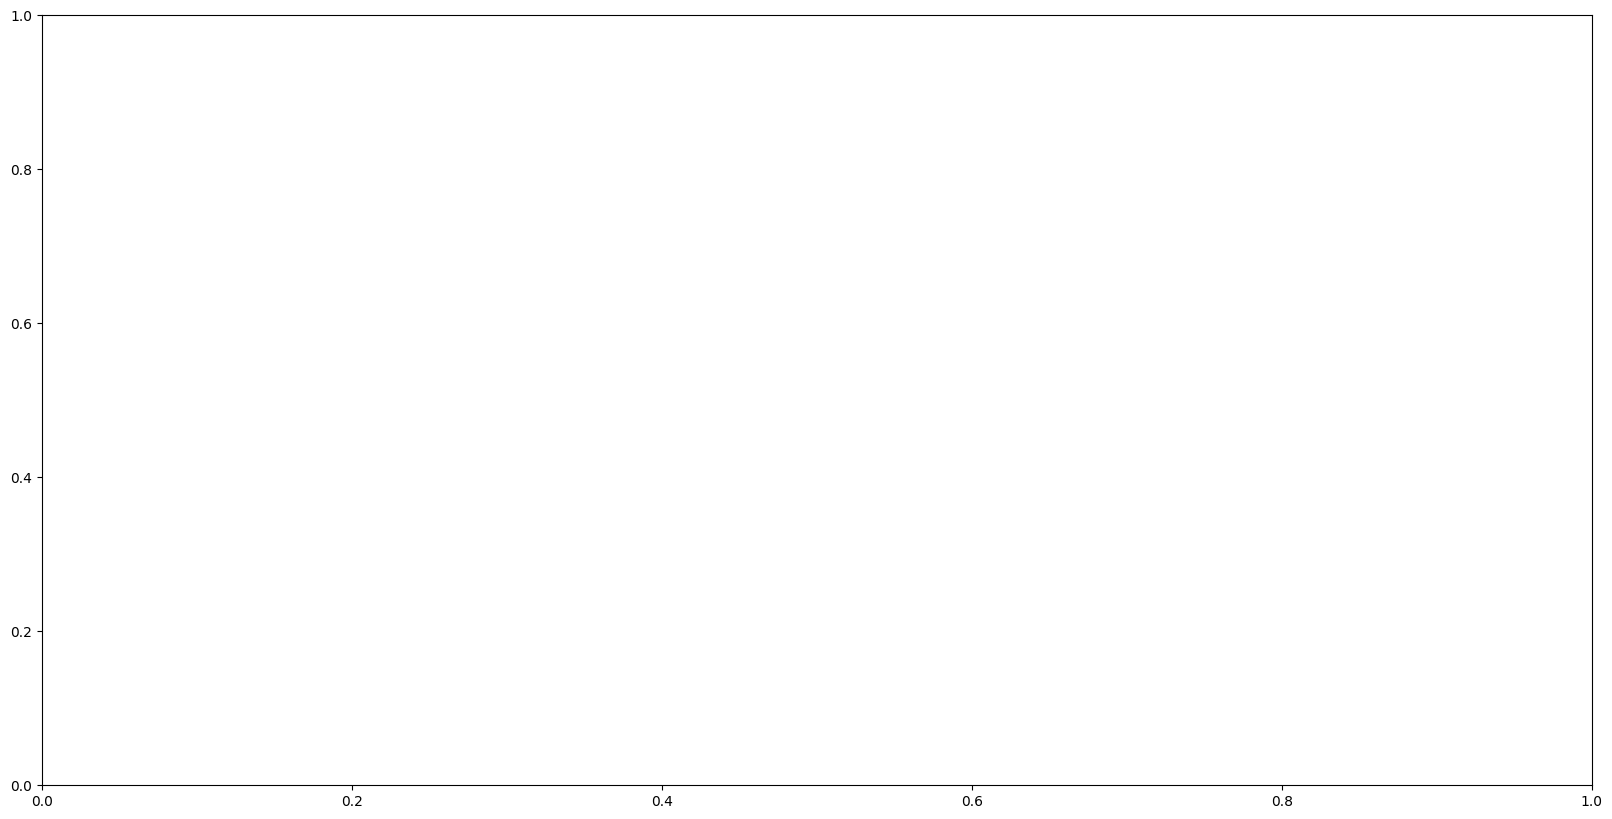

In [81]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

#sampling the model_df population
pca_df = model_df.reset_index()
pca_df = model_df.dropna(axis=0).iloc[:,1:]
pca_df = pca_df.iloc[::50]

#setting up PCA
pca = PCA(n_components=2, random_state=42)
pca = pca.fit_transform(pca_df.iloc[:, :-1])
labels = pca_df["label"]

#setting up plot components
#x_axis = pca[:,0]
#y_axis = pca[:,1]
color_map = ['blue', 'red', 'yellow', 'green', 'orange']

#color_map = pca_df["label"].map({1:"blue", \
#                                 2:"red", \
#                                 3:"yellow", \
#                                 4:"green", \
#                                 5:"orange"})

#plotting PCA
f, axes = plt.subplots(figsize=(20,10))
plt.scatter(x_axis, y_axis, color=color_map, s=1)
plt.show()
